# Assignment: Tree Based Method

## 1.Tree Implementation

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
from random import randrange

In [18]:
def loadDataset(filename):
    df = pd.read_csv(filename, index_col=0)
    print(df.head(10))
    input_features=['Age','Income','Limit','Cards','Student','Education']
    target_feature=['Balance']
    df_input=df[input_features+target_feature]
    df_input['Student'].replace('Yes',1,inplace=True)
    df_input['Student'].replace('No',0,inplace=True)
    
    train=df_input.sample(frac=0.75,random_state=3) #split into train and test
    test=df_input.drop(train.index)
    trainingSet=train.values
    testSet=test.values
    return trainingSet, testSet


In [19]:
def RSS(splits):
    residual = 0
    for split in splits:
        if(len(split) != 0):
            mean = np.mean([element[-1] for element in split]) #TODO
            residual = residual+ np.sum([ (element[-1] - mean)**2 for element in split]) #TODO
    return residual

In [20]:
split_1 = np.array([[[1,2,0,2],[2,4,0,8]],[[1,3,4,5]]])
RSS_value = RSS(split_1)
if (type(RSS_value) not in [int,float,np.float16,np.float32,np.float64]):
    print("TypeError : check your output")
elif(RSS(split_1) == 18.0):
    print("Your calculations are right, at least on this specific example")
else:
    print("Your calculations are wrong")

Your calculations are right, at least on this specific example


In [21]:
def split(index, value, data):  #data has a form like np.array([[1,2,0,2],[2,4,0,8]]), last element is a target value.
    left_split = [element for element in data if(element[index]<value)] #TODO condition
    right_split = [element for element in data if(element[index]>=value)] #TODO condition
    return [left_split, right_split]


In [22]:
verbose = False
def split_tester(data): #find optimal split
    optimal_split_ind, optimal_split_value, optimal_residual, optimal_splits = -1,-1,float("inf"),[] #initialization.
    for curr_ind in range(data.shape[1]-1): #for all features , Age, Income, Limit....
        min_val=np.min(data[:,curr_ind])
        for curr_val in data: #for all values in a feature of the data.
            if curr_val[curr_ind] == min_val:
                continue
            if(verbose):print("Curr_split : " + str((curr_ind, curr_val[curr_ind])))
            split_result = split(curr_ind, curr_val[curr_ind], data) 
                        
            if(verbose):print(split_result)
            residual_value = RSS(split_result)
            
            if(verbose):print("Residual : " + str(residual_value))
            if residual_value < optimal_residual:
                optimal_split_ind, optimal_split_value, optimal_residual, optimal_splits = curr_ind,\
                                                                    curr_val[curr_ind], residual_value, split_result
                
    return optimal_split_ind, optimal_split_value, optimal_splits   # index is feature, value is for crietria, splits is data list.

In [23]:
optimal_ind, optimal_value,_ = split_tester(np.array([[0,-10],[2,4],[4,5]]))
if (optimal_ind != 0):
    print("Your optimal split index is wrong (Careful, Python arrays starts at 0)")
elif(optimal_value != 2):
    print("Your optimal split value is wrong")
else:
    print("You found the good split index and value")

You found the good split index and value


In [24]:
def tree_building(data, min_size): #minimun data size in a split
    if(data.shape[0] > min_size): #building tree until the minimum.
        ind, value, [left, right] = split_tester(data) #get optimal criteria using split_tester
        left, right = np.array(left), np.array(right)
        return [tree_building(left, min_size), tree_building(right, min_size),ind,value]
    else:
        return data  #output is the data in a leaf node.

In [25]:
def predict(tree, input_vector):#recursive until reaching the leaf node.
    if(type(tree[-1]) != np.float64): #when reach the leaf node. tree represent the split data.
        if(len(tree) == 1):  #when number of data is 1
            return(tree[0][-1])   #get the wage in the data
        else:
            return(np.mean([element[-1] for element in tree]))   #average of a leaf node.
    else:  #before reaching leaf node
        left_tree, right_tree, split_ind, split_value = tree #information of the current split 
        if(input_vector[split_ind]<split_value): #which split the input data belong to
            return predict(left_tree, input_vector)
        else:
            return predict(right_tree, input_vector)
    

In [26]:
def getError(testSet, predictions):
    difference=np.sqrt(np.average((np.array(testSet)[:,-1]-np.array(predictions))**2))
    print('test plot')
    plt.plot(np.array(testSet)[:,-1], np.array(predictions),  'ro', label='test set')
    plt.plot(np.array(testSet)[:,-1], np.array(testSet)[:,-1], label='standard line')
    plt.xlabel("Target")
    plt.ylabel("Output")
    plt.legend()
    plt.show()
    return difference


# def Decision_Tree():
#     training_set,test_set=loadDataset('Credit.csv')
#     tree = tree_building(training_set,10)
#     predictions=[]
#     for employee in test_set:
#         predictions.append(predict(tree,employee))
#     error = getError(test_set, predictions)
#     print('Error(RMSE): ' + repr(error))
    
# Decision_Tree()

     Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
1    14.891   3606     283      2   34         11    Male      No     Yes   
2   106.025   6645     483      3   82         15  Female     Yes     Yes   
3   104.593   7075     514      4   71         11    Male      No      No   
4   148.924   9504     681      3   36         11  Female      No      No   
5    55.882   4897     357      2   68         16    Male      No     Yes   
6    80.180   8047     569      4   77         10    Male      No      No   
7    20.996   3388     259      2   37         12  Female      No      No   
8    71.408   7114     512      2   87          9    Male      No      No   
9    15.125   3300     266      5   66         13  Female      No      No   
10   71.061   6819     491      3   41         19  Female     Yes     Yes   

           Ethnicity  Balance  
1          Caucasian      333  
2              Asian      903  
3              Asian      580  
4              Asian    

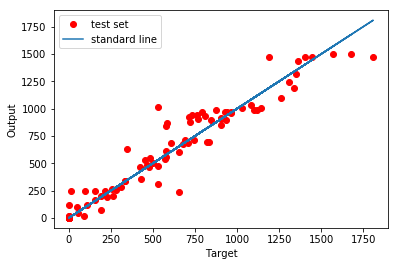

Error(RMSE): 121.47763121872065


In [50]:
def Subsample(dataset, ratio): #function of samping for  bootstrap
    sample = list()
    n_sample = round(dataset.shape[0] * ratio) #size of each boostrap
    while len(sample) < n_sample: #loop for sampling with replacement
        index = randrange(len(dataset))
        sample.append(dataset[index,:])
    return np.array(sample) #return a sampled bootstrap

def Bagging(repeat,ratio):
    training_set,test_set=loadDataset('Credit.csv')
    predictions=[]
    random.seed(3)
    for i in range (repeat):
        pred_temp=[] #list for prediction of each model
        train_subset=Subsample(training_set,ratio) #using a boostrap for training set.
        
        tree = tree_building(train_subset, 10) ####fill out here ### use 'tree_building' function for making a decision tree model using train_subset with min_size=10.
        
        for employee in test_set: #loop for each test data
            
            pred_temp.append(predict(tree, employee))####fill out here ##### we need to use 'predict' function to get a prediction of each test data 
            
        predictions.append(pred_temp) #append prediction of each model
        
    predictions_avg=np.mean(predictions,0)  ####fill out here ##### get an average predictions of models
    
    error = getError(test_set, predictions_avg)
    print('Error(RMSE): ' + repr(error))
    
Bagging(10, 1)